# A Disciplined Approach to Neural Network Hyper-Parameters: Part 1 - Learning Rate, Batch Size, Momentum, and Weight Decay.

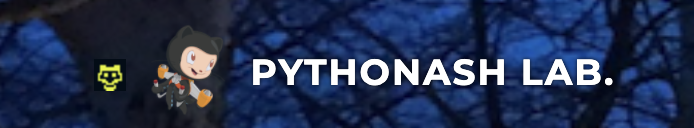


이 논문은 딥러닝을 학습시키는 과정에 있어서 학습률, 배치사이즈, 모멘텀, 그리고 가중치 부식의 하이퍼 파라미터 조정이 어떤 영향을 미치는지 조사한 보고서이다.

개인적으로는 딥러닝 학습과정에 있어서 다양한 견해를 얻을 수 있어서 꽤 가치있는 논문 이었다고 생각이 든다.

늘 그렇듯, 지식은 공유됨으로써 발전할 수 있다고 생각하기에 귀찮거나 영어가 불편한 분들을 위해 내가 읽고 느낀점을 논문에 기반해서 서술해 나갈 예정이다.

원문과 다른 해석이 있거나 틀린 부분이 있다면 언제든 피드백을 해주길 바란다.

# 목차

<a id="toc"></a>
- [1. Context](#1)
- [2. Review](#2)

<a id="1"></a>
# Context

비록 딥러닝이 이미지, 음성, 비디오 등을 처리하는 데에 있어서 눈부신 성공을 거두어왔지만, 하이퍼 파라미터 튜닝과 같이 불필요한 오랜 학습 시간을 필요로 한다.

이 논문은 학습 시간을 줄이고 성능을 개선시킬 수 있는 효율적인 하이퍼 파라미터 설정 방법을 제안한다.

학습 속도를 높이기 위해서 학습률이나 모멘텀을 어떻게 증가, 감소 시킬지를 논의하고, 여러 데이터셋과 네트워크 구조에 대한 적절한 균형에 대해서도 보여준다.

본 논문의 결과를 한번 따라해보고 싶다면 이 [링크](https://github.com/lnsmith54/hyperParam1)를 클릭해서 살펴보면 된다.

하이퍼 파라미터를 세팅하는 과정은 네트워크 구조를 디자인 하는 과정도 포함하는데, 이는 전문성을 요하고 과학적인 어떤 보편화된 접근보다는 운좋은 발견(serendipity)을 기반으로한 여러 시행착오를 거치게 된다. 

현재에는 하이퍼 파라미터를 세팅하기 위한 쉬운 방법은 없다. 특히, 학습률, 배치 사이즈, 모멘텀, 그리고 가중치 감소와 같은 파라미터 튜닝은 더 그렇다.

흔히 적절한 하이퍼 파라미터를 탐색하기 위한 방법으로 탐욕적 탐색 혹은 확률적 탐색 기법은 계산 소요시간이 너무 많이 든다.

그래서 이 논문에서는 학습률, 배치사이즈, 모멘텀 등 위에서 열거한 여러 하이퍼 파라미터들을 적절하게 조합하고 변화시켜서 모델의 성능이나 손실의 추이가 이떻게 되는지 살펴봄을 통해 적절한 하이퍼 파라미터 튜닝 접근법을 제시한다.

이 접근법은 과소적합과 과대 적합의 균형을 유지하는 것을 기반으로 이루어진다.

특히, 적절한 하이퍼 파라미터를 얻기 위해서 과소적합과 과대 적합의 단서를 테스트/검증 데이터셋의 손실을 조사함으로써 이루어진다.

이 논문에서는 학습률, 모멘텀, 그리고 규제들은 긴밀하게 엮여있고, 최적의 값들은 함께 결정되어야 한다고 한다.

몇몇의 최근 논문들은 높은 학습률과 작은 배치사이즈의 사용에 대해서 논의 한다(Jastrzebski et al., 2017; Xing et al., 2018).

이들은 배치사이즈에 대한 학습률의 비율이 학습을 좌우한다는 것을 증명했는데, 이는 본 논문에서 제시하는 바와는 조금 다른 시사점을 내포하고 있다. 즉, 적절한 혹은 최적의 학습률과 배치사이즈의 세팅이 선행 연구와는 다른 방향을 제시하고 있다는 것이다.

Lorraine & Duvenaud (2018)는 그레디언트를 하이퍼 파라미터로 미분함으로써 최적의 파라미터를 찾는 접근을 하기도 했는데 관심이 있다면 찾아보길 바란다.

- Jonathan Lorraine & David Duvenaud. 2018. Stochastic hyperparameter opimization through hypernetworks.


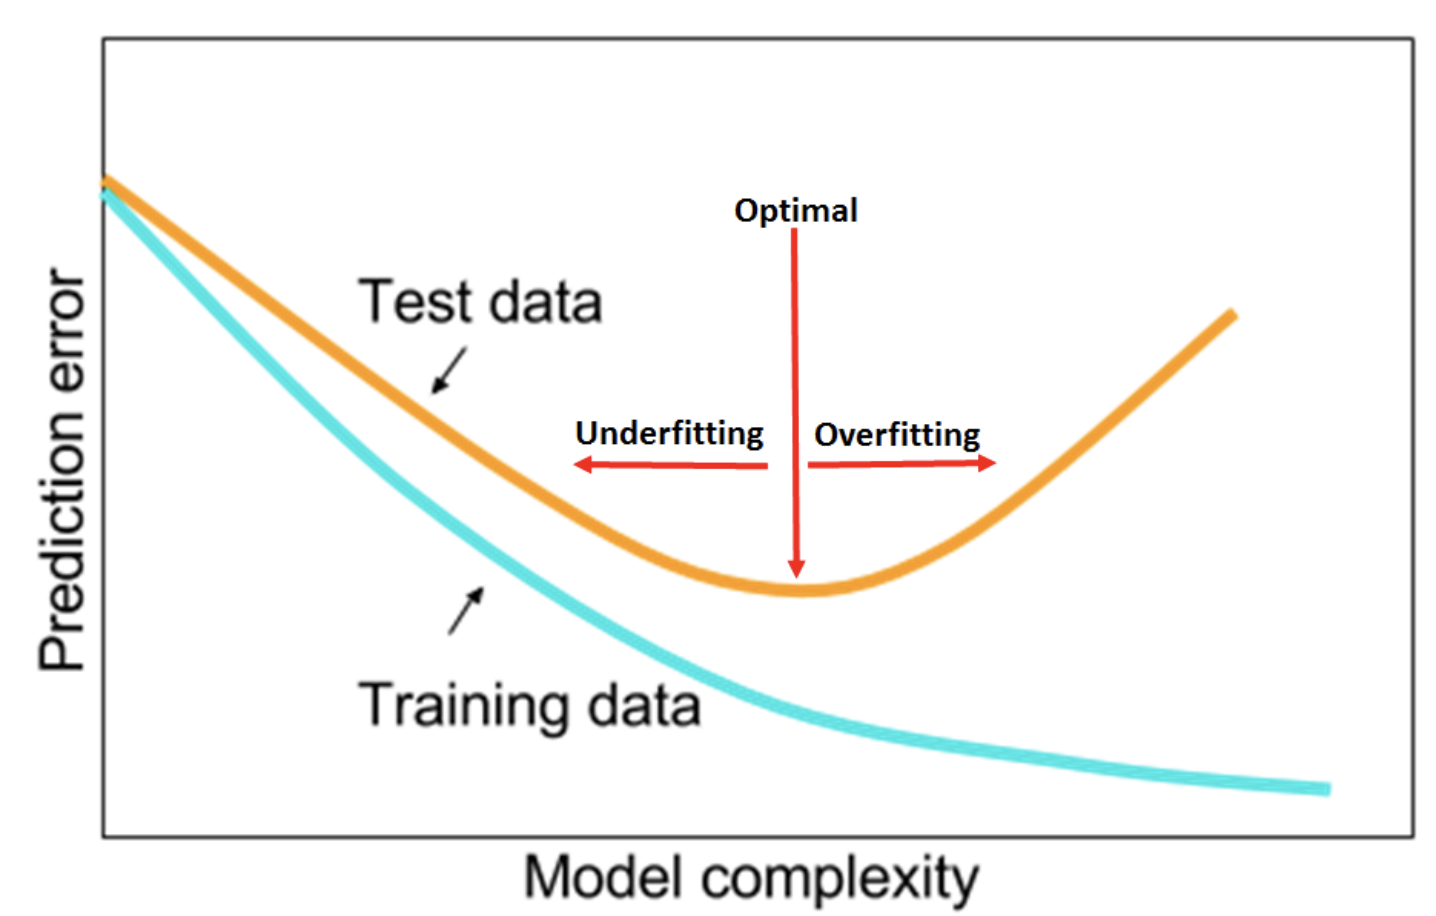

앞서 말했듯이, 본 논문은 과소적합, 과대적합을 기반으로 최적의 파라미터 조합을 찾고자 하는 접근법을 설명하고 있다.

이는 논문에 나와있는 사진인데, 말하자면 훈련/검증 손실은 네트워크가 잘 수렴하고 있는지 아닌지를 보여주는 좋은 지표가 된다는 것이다.

무엇보다도 네트워크가 과대, 과소 적합이 된다는 것은 성능이 개진될 수 있는 여지가 있다는 뜻이고 사진에서 `optimal`이라고 적힌 부분이야 말로 학습의 목표가 되는 지점이 된다.

모델이 너무 단순하다면(having not complexity) 복잡한 데이터셋의 패턴을 파악하거나 그 구조를 포착하는데에 있어서 학습이 덜 될것 이므로 과소적합 될 우려가 있다.

반대로, 모델이 너무 복잡하다면(having complexity) 학습데이터셋에 너무 편중되어 과대적합 될 여지가 있는 것이다. 

결국 하이퍼 파라미터 튜닝을 왜 하는가? 라는 물음에 대한 대답은, 테스트 로스의 수평선에 도달하기 위한 것이라고 할 수 있다.


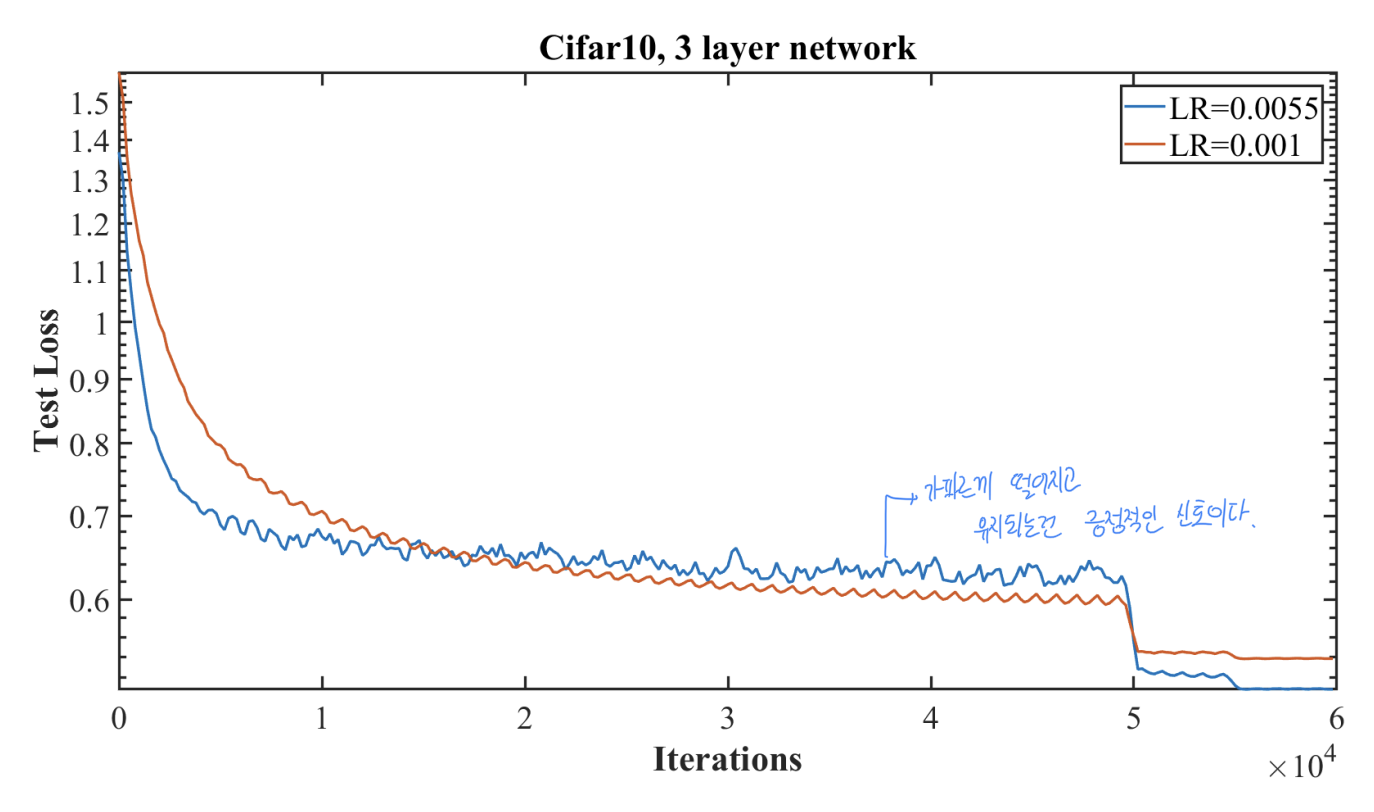

적절한 하이퍼파라미터 튜닝을 통해 학습을 진행하는 과정에서, 파란색 선과 같이 가파르게 떨어지고 수평으로 유지되는건 다른 로스 그래프보다 좋은 결과를 낼 수도 있는 긍정적인 신호라고 설명하고 있다.

다른 중요한 하이퍼 파라미터 중에서도 학습률에 대한 이야기가 나오는데, 이는 본 논문의 저자가 아니더라도 대부분의 인공지능 학자, 개발자, 실무자들이 입모아 얘기하는 아주 중요한 파라미터이다.

먼저, 학습률이 너무 작으면 과대적합이 일어날 수도 있다. 반대로 학습률이 크면 학습과정을 규제하는데에 도움이 될지는 몰라도 너무 크게되면 학습이 수렴하지 못하고 발산할 수도 있다. 

적절한 학습률을 고르는 접근으로 Simith (2015) and Simith (2017)에서 제안한 방법으로 `순환적 학습률`과 `학습률 범위 테스트`라는 것이 있다.

`순환적 학습률`은 최소와 최대 학습률 범위와 단계 범위(stepsize)를 정해야 한다. 여기서 단계 범위는 매 학습 단계마다 학습을 진행하는 반복 횟수(혹은 에포크)를 말하고, 순환(주기)은 학습률이 선형적으로 증가하는것과, 그리고 반대로 최대 지점에서 최소로 감소하는 두 단계로 구성되어 있다. 만약 단계 범위라는 말이 어렵다면, 간단하게 신경망을 학습시킬 때 전체 데이터셋을 배치사이즈로 나눠 학습을 진행하는 것을 떠올려 보면 이해가 쉬울 수도 있다.

`학습률 범위 테스트`는 작은 학습률에서 시작해서 천천히 학습률을 선형적으로 증가시키는 것이다. 이게 앞의 개념과 다른것은, 학습률의 변화가 하나의 학습과정 내에 있지 않다는 것, 쉽게 말해서 전자는 학습률 증가 및 감소가 한 학습과정내에 있다고 한다면, `학습률 범위 테스트`는 학습률을 선형적으로 변화시켜서 학습하는 것이 독립적이다(매 시행마다 따로따로). 따라서, 어떤 모델을 일정한 학습률로 놓고 훈련을 시켰을 때 발산하는 지점을 찾게 된다면 그 학습률이 바로 그 모델의 extrema 즉, 한계 지점의 학습률이라고 볼 수 있다.

이 두 개념이 시사하는 바는, 적절한 학습률이라는 것에 최소 범위와 최대 범위가 존재한다는 것. 그리고 이 범위 내의 적절한 학습률을 찾는 것은 선형적으로 학습률을 변화시킴으로써 찾을 수 있다는 것이다.

흔히, 학습률을 높게 설정해서 점점 감소시켜나가며 최적의 학습 지점을 찾는 전략을 많이 떠올리고 실제로도 사용하고 있다.

하지만, 역으로 작은 학습률에서 시작해서 점점 높은 학습률로 증가시켜 훈련시킴으로써 더 좋은 성능을 내는 경우도 있는데 이는 특히나 네트워크를 더 빠른 속도로 수렴하게 만들어 이른바 `Super-convergence` 라고도 불린다.

`Super-convergence`는 Smith & Topin (2017)에 의해 소개되었는데, 일반적인 것과 다르게 큰 학습률을 사용함으로써 매우 빠르게 학습을 한 결과를 보여주었다. 사용된 네트워크와 데이터 셋은 Deep resnet과 cifar-10, cifar-100 데이터셋 이다.

매우 큰 학습률은 과대적합을 방지할 수 있는 규제의 측면에서 이점이 있고, 네트워크를 더 빠르게 학습시킬 수 있다는 이점이 있다.

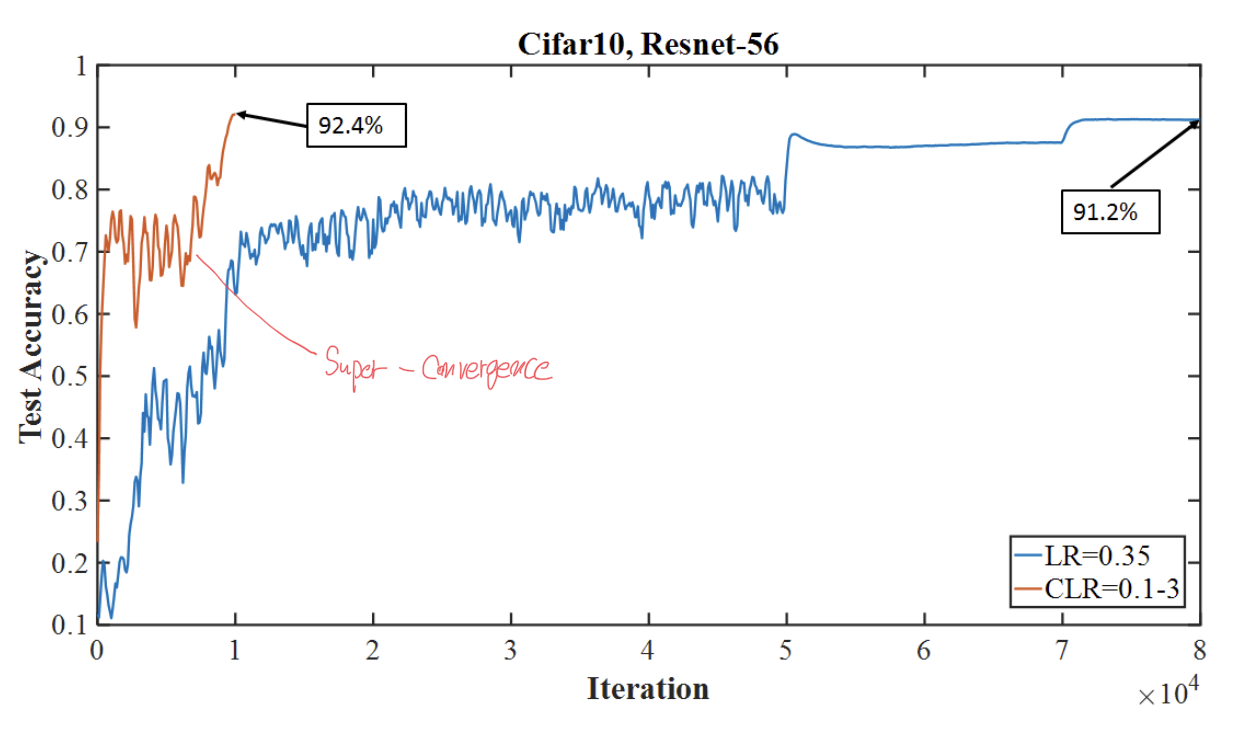

위 사진에서 빨간색 선은 앞서 언급한 순환 학습률인데, 학습률을 0.1에서 3까지 선형적으로 증가시켜 얻은 결과 이다. 물론 파란색 선의 학습률이 너무 큰 것도 있지만, 보다 독보적으로 그리고 높은 정확도로 네트워크 수렴을 마감한 것을 알 수 있다.

여기에 저자들은 조금 더 수정을해서 한가지 전략을 제안하는데, 이러한 super-convergence를 전략에 있어서 학습 횟수(혹은 에포크)의 총합보다 더 작고, 학습률을 감소시키게 끔하는 하나의 순환 주기를 "1 cycle"이라고 하며, 이를 본 논문의 실험에서 사용했다. 실제로 이 전략은 네트워크를 더 빠르게 수렴하게 하고 또 좋은 성능을 내기도 하는데, 이는 본 연구진의 독보적인 전략이라기 보단 Aarts & Korst (1988)과 Bengio et al. (2009)로 부터 아이디어를 얻은 것이라고 볼 수 있다.

또한, 이런 학습률을 사용하는 것과 동시에 다른 규제기법을 사용함에 있어서도 적절한 밸런스가 필요하다고 하는데 본 연구진에 따르면 매우 큰 학습률을 사용할 때 다른 규제 법을 줄이는 것은 학습 과정을 매우 효율적으로 만든다고 한다.

정리하면, 매우 큰 학습률은 그 자체로도 규제가 되기도 하고 또 학습을 진행함에 있어서 다른 규제 기법의 사용을 줄이게 되면 더 효율적인 학습을 가능하게 할 수 있다고 하는 것이다.

배치사이즈도 학습을 좌우하는 아주 중요한 파라미터 중 하나인데, 기본적으로 작은 배치사이즈가 그동안 규제 기법과 같은 효과를 내는 등 추천되어왔던 방식이다.

하지만, 으레 사례 연구나 데이터를 기반으로한 연구가 그렇듯이 모든 경우에 적용되지는 않는데 이 연구에서도 오히려 작은 배치사이즈 보단 큰 배치사이즈가 더 좋은 효과를 내는 것을 보여주었다.

본 논문에 따르면, 순환 학습률 전략을 이용하면, 보다 큰 배치 사이즈에서도  큰 학습률의 사용을 할 수 있다고 한다. 그런데 나는 개인적으로 의문이 드는게 이 논문에서는 분명 충분히 큰 배치사이즈가 더 좋은 테스트 정확도를 보여주지만, 작은 배치사이즈가 종국에는 더 낮은 테스트 손실로 수렴하는 것을 보여준다.

이러한 현상에 대해서 본 연구진 또한 "일반적이지 않다." 로 일축하고 있어서 왜 그렇게 된건지, 분명 작은 배치사이즈가 손실 값은 더 낮은데, 큰 배치사이즈가 정확도가 더 높은 현상에 대해서는 어떻게 된건지 서술하고 있지는 않아서 정확한 내막은 알 수 없다. 그리고 배치 사이즈는 학습을 진행하는 컴퓨터의 용량이나 메모리 등에 대한 한계가 있다. 따라서 본 논문에서도 `배치 사이즈는 그냥 당신의 하드웨어 메모리에 맞게끔 설정하고 학습률을 크게 해라.` 라고 설명되어 있는데, 이러한 일련의 기술들로 미루어 보면 아직 적절한 배치 사이즈는 무엇인가? 에 대한 물음에는 보다 많은 연구가 필요할 것으로 생각된다. 

그 다음 내용으로는 순환 모멘텀, 가중치 감소에 대한 이야기가 나온다.

본 논문에서는 확률적 경사 하강법(Stochastic gradient descent)을 사용했기 때문에, 모멘텀에 대한 얘기가 나오는 것 같은데 한 마디로 정리하면, 본 논문에서 사용한 네트워크와 데이터 셋 구조에서 최적의 조합은 `작은 학습률에서 선형적으로 증가시키는 순환 학습률 전략 & 확률적 경사 하강법에서 사용되는 모멘텀 파라미터를 천천히 감소 시키는 것`이다. 반대로, 학습률이 일정하다면 최적의 모멘텀은 그냥 최적의 모멘텀 상수를 찾는 것이다.

가중치 감소에 대해서는 저자들의 설명으로 만약 적절한 가중치 감소 값을 모른다면, 일단 0.001, 0.0001, 0.000001로 테스트 해보는 것을 추천하고 있다. 특히, 데이터셋과 모델 구조가 단순하거나 작다면 보다 큰 가중치 감소 값이 필요하고, 데이터셋이 크고 모델이 복잡한 구조라면 작은 가중치 값이 필요하다고 말한다. 

그렇다면 가중치 감소, 학습률, 그리고 모멘텀에 대한 값이 동시에 결정될 수 있는가? 에 대해 궁금증을 품어볼 수 있는데 이 논문을 읽고 난 뒤, 나의 대답은 "그럴 수 없다." 이다.

적절한 가중치 감소 값은 일정한 학습률을 사용하느냐, 혹은 순환 학습률을 사용하느냐에 따라 다르고 이는 또한 저자들의 직관과도 일치한다. 왜냐하면, 학습률이 크면 더 규제 효과가 있고 그에 따라 더 작은 가중치 감소가 최적임을 보여주고 있기 때문이다.

이후에는 다른 데이터셋과 모델들을 사용해서 보다 robust한 결과를 산출하기 위한 과정이 진행되고, 마지막 Discussion에선 다음과 같이 말하는데, 난 이 부분이 본 논문의 핵심이라고 생각이 든다.

`"Unfortunately, there are contradictory recommendations of this kind in literature, which is reminiscent of the parable of the blind men and the elephant."`

분명 딥러닝이라는 것은, 나아가 인공지능이라는 것은 정말 엄청난 기술임은 분명하다. 

아직 그 미지의 세계를 우리 인간이 이해하기에는 우리의 시야가 너무 좁고 역사가 그리 오래되지 않아 부분적인 현상을 관찰한 후 논의를 할 수 밖에 없지만, 그 누구의 주장도 관점에 따라 맞을 수도 있고 틀릴 수도 있으니 보다 겸손한 자세로 우리가 받아들였으면 좋겠다는 생각이 든다.

<a id="2"></a>
# Review

내가 딥러닝을 파고들게 된건 학교 수업도 아니고, 주변 지인이나 학교 교수님 혹은 친구 때문도 아니다.

그저 우연히 통계학과 및 산업공학과라는 나의 전공을 어떻게 써먹을 수 있을까 하는 막연한 생각이 들었고, 그저 우연히 내가 코딩을 꽤 재밌어 한다는 것을 알게 되었으며, 그저 우연히 딥러닝에 대한 이론과 설명 혹은 응용이 크게 불편하지 않았다는 점에서 시작하게 되었다.

그래서 종종 심심할 때마다 혹은, 좋은 자료가 있을 때마다 이러한 논문을 찾아보고, 읽어보고, 시간이 된다면 코드로 구현해 보는 등 활동을 하는데 그러한 과정에서 가장 회의적으로 느끼는 것은, 인터넷 세상에 정제되어 있지 않은 정보가 너무 많다는 것이다.

정확히는 어느 정도만 맞는 정보라던가, 맥락은 맞으나 기술되어 있는 설명은 틀린 그러한 내용, 코드, 이론 등이 너무 많다는 것이다.

이는 비단 인터넷 뿐만이 아니라 출판되는 책도 그러한데, 그러한 오류를 찾아낼 때면 혹시 나도 이러한 정보를 흘리고 있지는 않은지 경계하게 된다.

물론 그러한 저자들이 혹은, 정보를 제공하는 사람들의 잘못 뿐만은 아니라고 생각해서 그들을 탓하는 것은 아니고, 나 또한 그러한 그들 중 하나일지 모르니 함부로 말하긴 어렵다.

그래도 내가 당부하고 싶은 것은 모든 정보를 액면 그대로 받아들이지 말고, 자신의 경험, 지식, 정보, 지혜 등을 기반으로 한 선별적인 판단을 해야한다는 것이다.

그러한 맥락에서 이 논문도 경계하며 읽을 필요가 있다고 생각한다.

`"학습률을 작게 시작하여 선형적으로 증가시키며 훈련을 하면 더 빠르게, 더 좋게 학습할 수 있다."` 라는 것은 이 논문에서 말하자면 `그러한 현상이 발견 되었다.` 정도로 요약할 수 있다. 즉, 어떠한 수학적인 공식이나 과학적인 논리에 따른 증명을 통해 분석된 증거가 아닌 순수한 Empirical evidence정도 이기 때문에 너무 신봉하면 안된다는 말이다.

물론, 이러한 실험적인 결과는 블랙박스라고 불리우는 딥러닝 세계를 탐험하기 위한 소중한 발걸음 중 하나라고 생각된다.

논문 리뷰에서도 말했듯이(장님과 코끼리) 우리는 딥러닝에 있어서 모두 장님이기 때문에 저 마다의 현상을 논의 함에 있어서 적절한 수용과 비판은 필수적이라고 생각한다.

그런 의미에서 이 논문은 내게 부족했던 하이퍼 파라미터 튜닝에 대한 인식과 정보를 채워주고, 보다 많은 사례 연구를 소개해줌으로써 다양한 아이디어를 제공해 줘서 고마운 논문이다. 하지만, 여기서 얘기한 접근법들이 대체로 어디까지 적용이 될 수 있을지는 내가 경험을 더해가면서 깨우쳐봐야할 영역이 될 것 같다.





# Reference

L.N. Smith. 2018. A DISCIPLINED APPROACH TO NEURAL NETWORK
HYPER-PARAMETERS: PART 1 – LEARNING RATE,
BATCH SIZE, MOMENTUM, AND WEIGHT DECAY.